In [1]:
# Importing required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings

In [2]:
# Suppress warnings
warnings.filterwarnings("ignore")

In [3]:
# Avoid threading issues
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

In [4]:
# Load dataset
ifood_df = pd.read_csv("ifood_df.csv")

In [5]:
# Data Preprocessing
ifood_df = ifood_df.drop(columns=['Z_CostContact', 'Z_Revenue'])
ifood_df = ifood_df.dropna()

In [6]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ifood_df)

In [7]:
# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

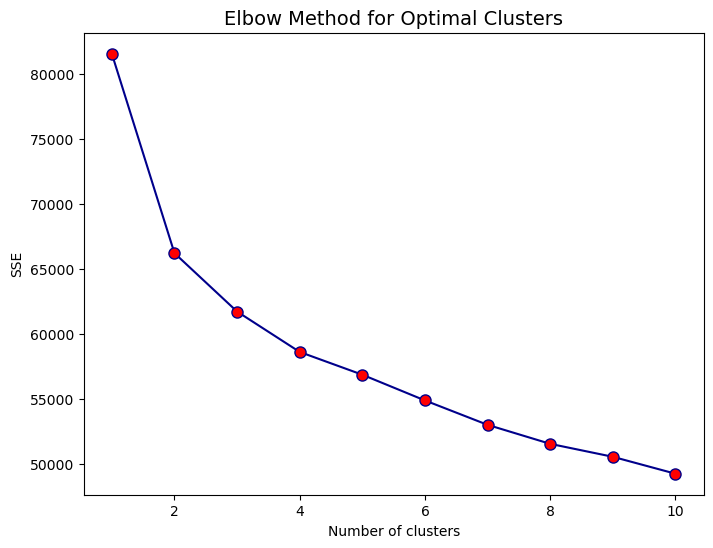

In [8]:
# Plot elbow graph with attractive colors
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', color='darkblue', markerfacecolor='red', markersize=8)
plt.title("Elbow Method for Optimal Clusters", fontsize=14)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [9]:
# Apply KMeans clustering
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
ifood_df['Cluster'] = kmeans.fit_predict(scaled_data)

In [10]:
# Silhouette score
silhouette_avg = silhouette_score(scaled_data, ifood_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.12474193666820865


<Figure size 1200x800 with 0 Axes>

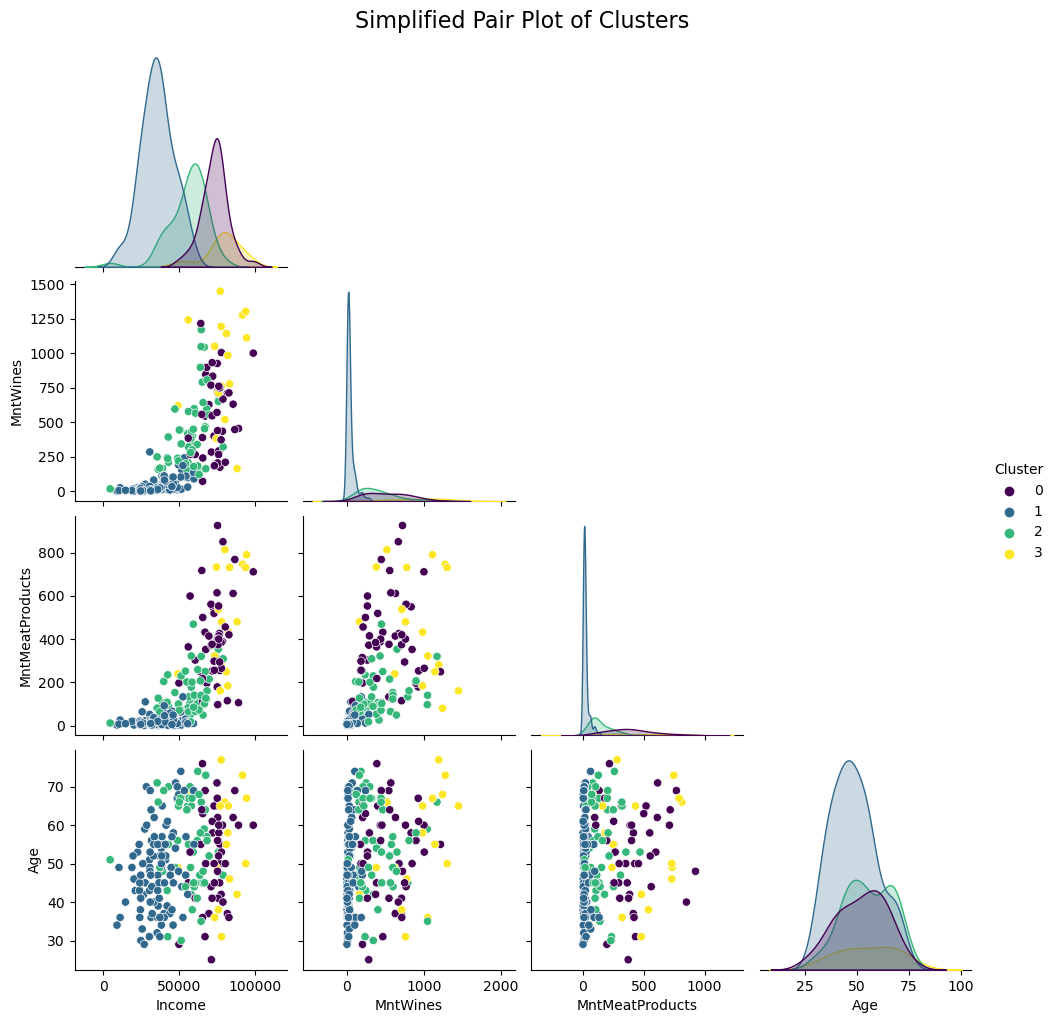

In [11]:
# Pair plot with selected key features to reduce complexity
plt.figure(figsize=(12, 8))
selected_features = ['Income', 'MntWines', 'MntMeatProducts', 'Age', 'Cluster']
sns.pairplot(ifood_df[selected_features].sample(frac=0.1, random_state=42), hue="Cluster", palette="viridis", corner=True)
plt.suptitle("Simplified Pair Plot of Clusters", y=1.02, fontsize=16)
plt.show()

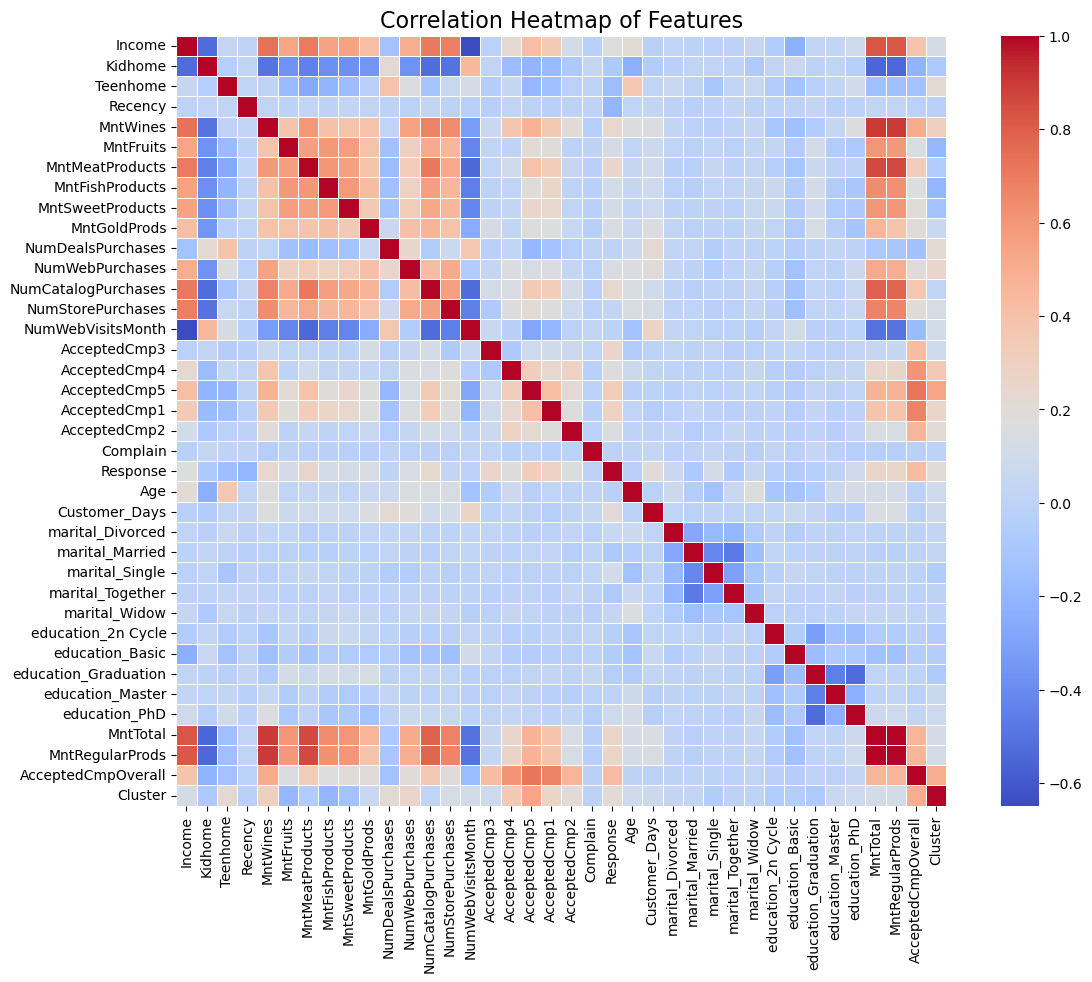

In [12]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = ifood_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

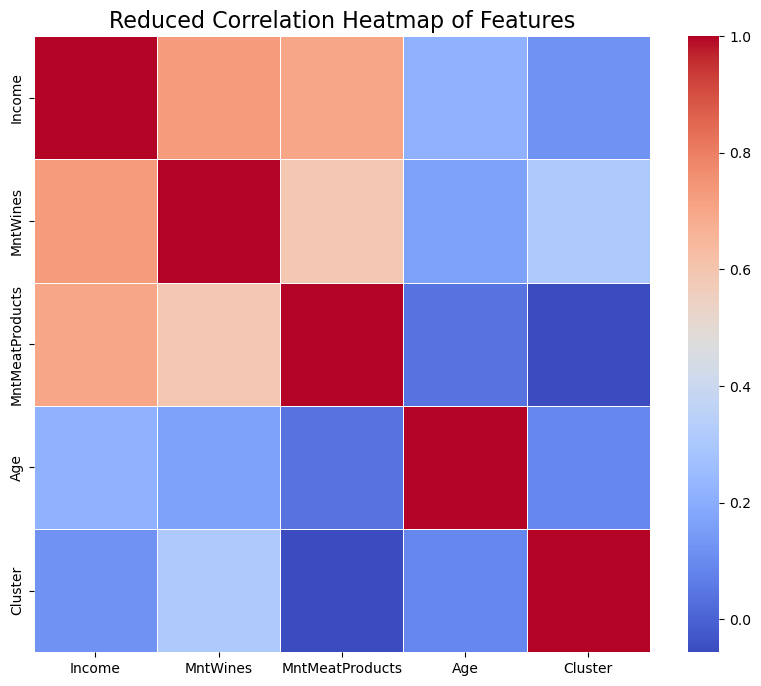

In [13]:
# Reduced correlation heatmap with only key features
plt.figure(figsize=(10, 8))
corr_matrix = ifood_df[selected_features].corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Reduced Correlation Heatmap of Features", fontsize=16)
plt.show()

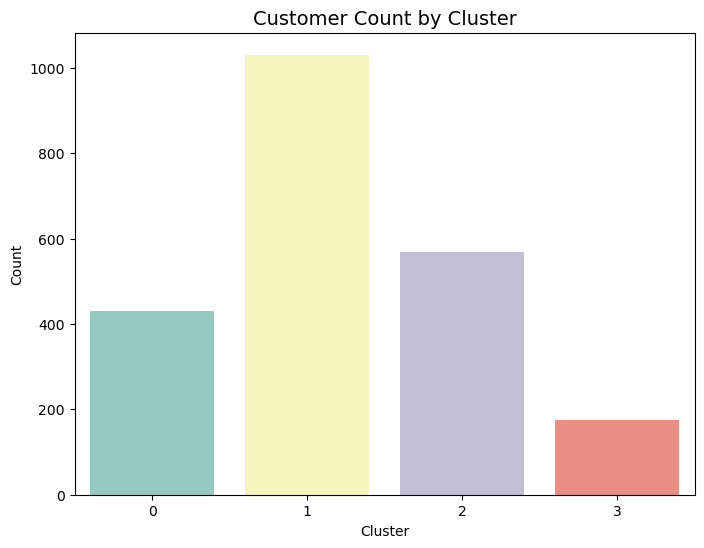

In [14]:
# Cluster count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=ifood_df, x='Cluster', palette="Set3")
plt.title("Customer Count by Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

In [15]:
# PCA for visualization in 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
ifood_df['PCA1'] = pca_data[:, 0]
ifood_df['PCA2'] = pca_data[:, 1]

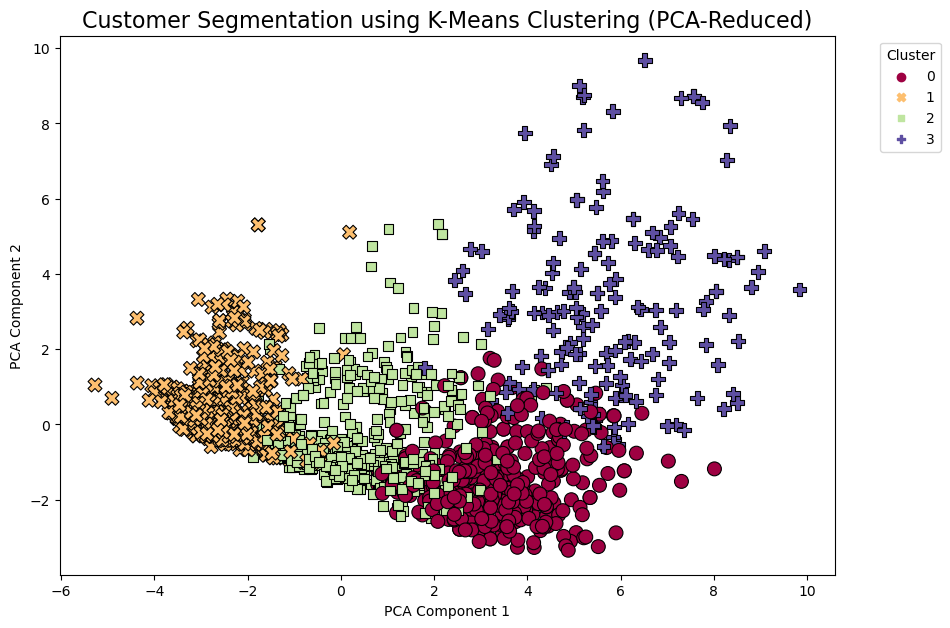

In [16]:
# Enhanced scatter plot for clusters with attractive colors
plt.figure(figsize=(10, 7))
sns.scatterplot(data=ifood_df, x='PCA1', y='PCA2', hue='Cluster', palette='Spectral', s=100, edgecolor="black", style="Cluster", markers=True)
plt.title("Customer Segmentation using K-Means Clustering (PCA-Reduced)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

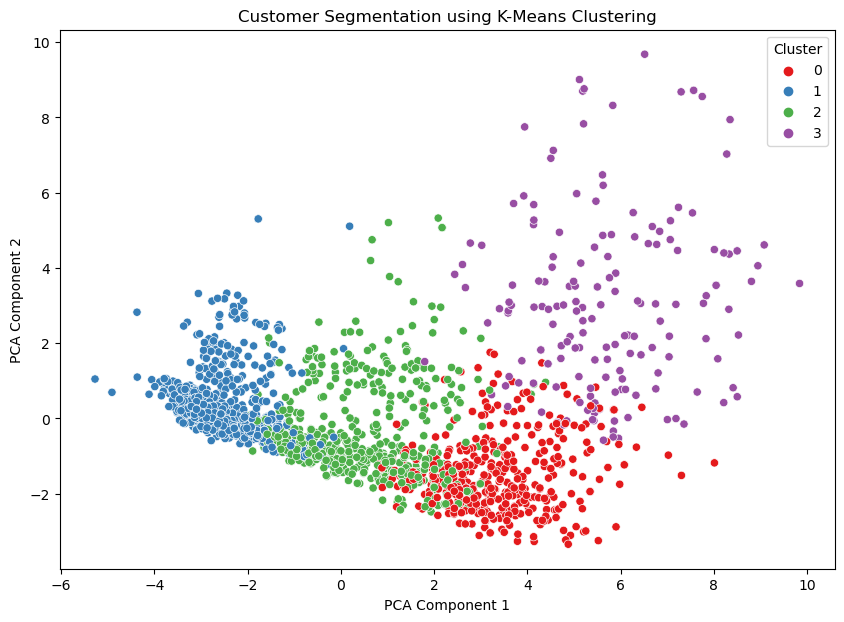

In [17]:
# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=ifood_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("Customer Segmentation using K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()